In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import wordcloud as wc

# Load Data
Load the dataset into the notebook with SQLite

In [2]:
version2_path = "../data/raw/td_V2.db"
con2 = sqlite3.connect(version2_path)

jira_query = """SELECT *
     FROM jira_issues"""

commits_query = """SELECT *
    FROM git_commits_changes"""

In [3]:
jira = pd.read_sql(jira_query, con2)
commits = pd.read_sql(commits_query, con2)

In [4]:
jira.describe()

,PROJECT_ID,KEY,PRIORITY,TYPE,SUMMARY,DESCRIPTION,CREATION_DATE,RESOLUTION_DATE,HASH,COMMIT_DATE
count,30147,30147,30147,30147,30147,30147,30147,30147,30147,30147
unique,29,30147,6,14,30053,27491,30145,29942,29395,29380
top,org.apache:hive,MRM-2000,Major,Bug,LLAP: merge master into branch,,2017-02-20 05:48:37 +0000,2013-06-08 03:15:45 +0000,f7defd32d8075bbc6d6f41b0482e8aa8775ce7ab,2014-12-09 14:28:20 +0000
freq,14024,1,21670,16405,19,2567,2,8,24,24


In [5]:
commits['LINES_ADDED'] = commits['LINES_ADDED'].astype(int)
commits['LINES_REMOVED'] = commits['LINES_REMOVED'].astype(int)
commits.head()

,PROJECT_ID,FILE,COMMIT_HASH,DATE,COMMITTER_ID,LINES_ADDED,LINES_REMOVED,NOTE
0,org.apache:batik,README,b1ff4af6abfec32fc710d77795bb20a612a82126,2000-10-01 07:37:01+00:00,James Duncan Davidson,2,0,Initial revision git-svn-id: https://svn.apa...
1,org.apache:batik,README,c8d7a13470987f892f7466d55c10e3cee34de31d,2000-10-01 07:40:39+00:00,James Duncan Davidson,4,1,Update PR: git-svn-id: https://svn.apache.or...
2,org.apache:batik,README,93a16402b48ae1cf70ea4bd030479170749bd10a,2000-10-01 08:15:04+00:00,James Duncan Davidson,3,0,Added question line (more a test of list/forwa...
3,org.apache:batik,README,fcaecb541edc03f36b6ec7a792e97dfeabf26117,2000-10-02 13:33:11+00:00,Dean Jackson,1,0,testing commit git-svn-id: https://svn.apach...
4,org.apache:batik,README,2ecc354fa4f3209adad11560abad29ca3fb9b95d,2000-10-02 13:39:12+00:00,Dean Jackson,0,2,undoing the test commit git-svn-id: https://...


# Initial exploration
Check basic information about the tables

In [6]:
print(f'   [JIRA table] nrows: {jira.shape[0]}  | ncols: {jira.shape[1]}')
print(f'[COMMITS table] nrows: {commits.shape[0]} | ncols: {commits.shape[1]}')

   [JIRA table] nrows: 30147  | ncols: 10
[COMMITS table] nrows: 857740 | ncols: 8


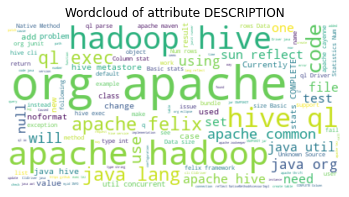

In [7]:
full_text = ' '.join([row for row in jira["DESCRIPTION"]])
descriptions_wc = wc.WordCloud(background_color="white").generate(full_text)
plt.imshow(descriptions_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of attribute DESCRIPTION");

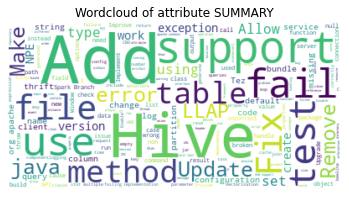

In [8]:
full_text = ' '.join([row for row in jira["SUMMARY"]])
descriptions_wc = wc.WordCloud(background_color="white").generate(full_text)
plt.imshow(descriptions_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of attribute SUMMARY");

# Data quality
The objectives of this section are:
- Check that the amount of data is enough
- Check the amount of missing values

In [9]:
# number of null descriptions
attrs = ["PROJECT_ID", "DESCRIPTION", "SUMMARY", "CREATION_DATE", "RESOLUTION_DATE", "TYPE"]
print("{JIRA Table}")
for attr in attrs:
    print(f"--- [{attr}] ---")
    print("NA values:", sum(jira[attr].isna()))
    proportion = sum(jira[attr]=="") / len(jira)
    print("# Empty values:", sum(jira[attr]==""), f" Proportion: {proportion:.03}")
    print("# Different values:", len(set(jira[attr])))
    print()

{JIRA Table}
--- [PROJECT_ID] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 29

--- [DESCRIPTION] ---
NA values: 0
# Empty values: 2567  Proportion: 0.0851
# Different values: 27491

--- [SUMMARY] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 30053

--- [CREATION_DATE] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 30145

--- [RESOLUTION_DATE] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 29942

--- [TYPE] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 14



In [10]:
# number of null descriptions
attrs = ["LINES_ADDED", "LINES_REMOVED", "FILE", "COMMIT_HASH", "NOTE"]
print("{COMMITS TABLE}")
for attr in attrs:
    print(f"--- [{attr}] ---")
    print("NA values:", sum(commits[attr].isna()))
    proportion = sum(commits[attr]=="") / len(commits)
    if attr in ["LINES_ADDED", "LINES_REMOVED"]:
        print("# 0 values:", sum(commits[attr]==0), f" Proportion: {proportion:.03}")
    else:
        print("# Empty values:", sum(commits[attr]==""), f" Proportion: {proportion:.03}")
    print("# Different values:", len(set(commits[attr])))
    print()


{COMMITS TABLE}
--- [LINES_ADDED] ---
NA values: 0
# 0 values: 175203  Proportion: 0.0
# Different values: 2614

--- [LINES_REMOVED] ---
NA values: 0
# 0 values: 306449  Proportion: 0.0
# Different values: 2187

--- [FILE] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 146313

--- [COMMIT_HASH] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 107909

--- [NOTE] ---
NA values: 0
# Empty values: 0  Proportion: 0.0
# Different values: 107030



### Text Lengths

In [11]:
desc_lens = jira["DESCRIPTION"].apply(lambda x: len(x.split(" ")))
desc_no_outlier_lens = desc_lens[desc_lens< 20_000]

sum_lens = jira["SUMMARY"].apply(lambda x: len(x.split(" ")))
sum_no_outlier_lens = sum_lens[sum_lens< 40_000]

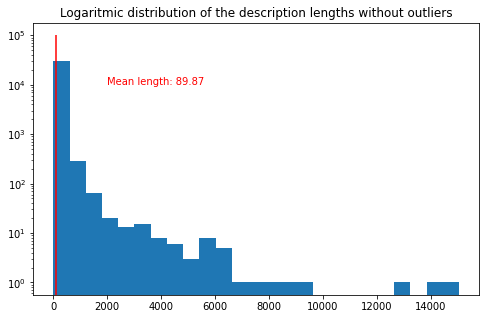

In [12]:
plt.figure(figsize=(8,5))
plt.hist(desc_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(desc_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")
plt.title('Logaritmic distribution of the description lengths without outliers')
plt.text(2000, 10**4, 'Mean length: '+str(round(np.mean(desc_no_outlier_lens),2)), color='red')
plt.show()

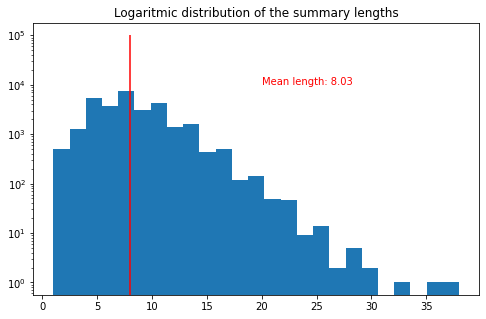

In [13]:
plt.figure(figsize=(8,5))
plt.hist(sum_no_outlier_lens, log=True, bins = 25)
plt.vlines(np.mean(sum_no_outlier_lens), ymin=0, ymax = 10**5, colors="red")
plt.title('Logaritmic distribution of the summary lengths')
plt.text(20, 10**4, 'Mean length: '+str(round(np.mean(sum_no_outlier_lens),2)), color='red')
plt.show()

# Attributes distribution

## Time distribution

In [14]:
import datetime as dt

def parse_date(x):
    return dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S +0000')

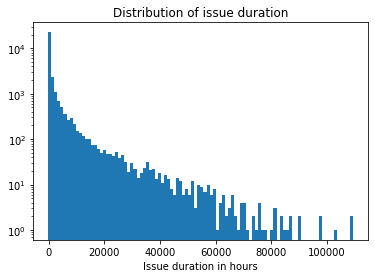

In [15]:
durations = jira["RESOLUTION_DATE"].apply(parse_date) - jira["CREATION_DATE"].apply(parse_date)
jira["duration"] = [d.days*24 + d.seconds/3600 if d.days > 0 else -100 for d in durations]
plt.hist(jira["duration"], bins=100, log=True, stacked=True);
plt.title('Distribution of issue duration')
plt.xlabel('Issue duration in hours')
plt.show()

## Categorical distribution

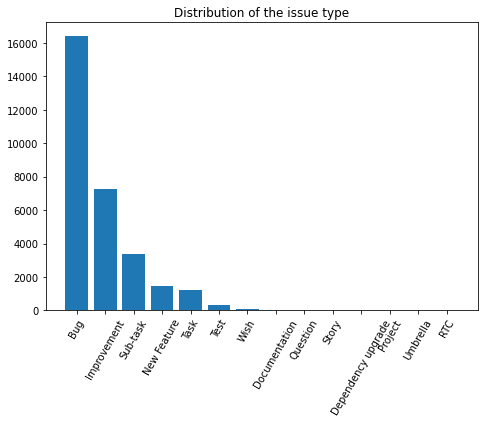

In [16]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])
type = list(pd.DataFrame(pd.value_counts(jira['TYPE'])).index)
freq = pd.DataFrame(pd.value_counts(jira['TYPE'])).TYPE
ax.bar(type,freq)
plt.xticks(rotation=60)
plt.title('Distribution of the issue type')
plt.show()

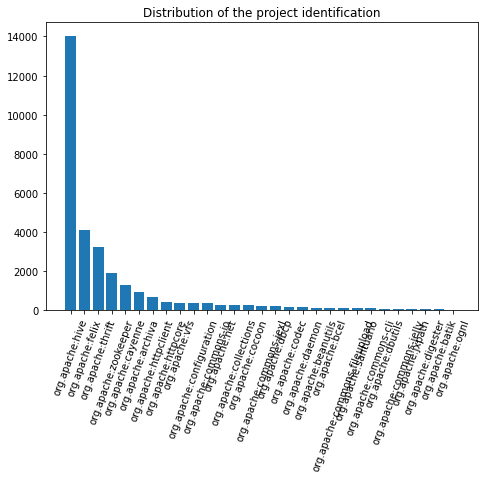

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
proj = list(pd.DataFrame(pd.value_counts(jira['PROJECT_ID'])).index)
freq = pd.DataFrame(pd.value_counts(jira['PROJECT_ID'])).PROJECT_ID
ax.bar(proj,freq)
plt.xticks(rotation=70)
plt.title('Distribution of the project identification')
plt.show()

## COMMITS CHANGES distribution

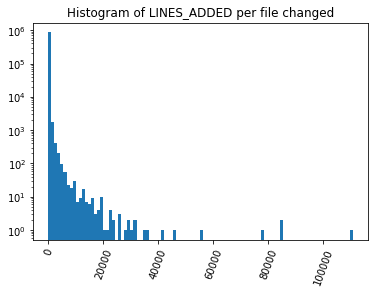

In [18]:
plt.hist(commits['LINES_ADDED'].astype(int), bins=100, log=True)
plt.title("Histogram of LINES_ADDED per file changed")
plt.xticks(rotation=70);

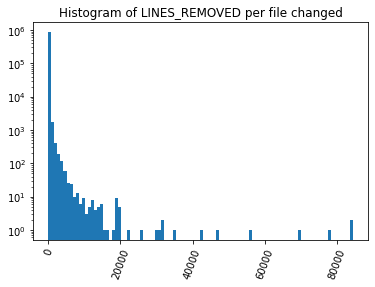

In [19]:
plt.hist(commits['LINES_REMOVED'].astype(int), bins=100, log=True)
plt.title("Histogram of LINES_REMOVED per file changed")
plt.xticks(rotation=70);

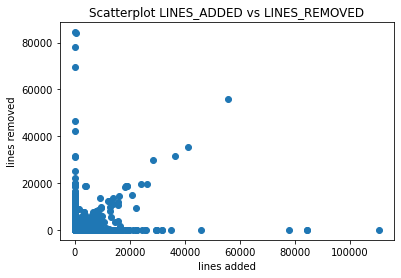

In [20]:
plt.scatter(commits['LINES_ADDED'].astype(int), commits['LINES_REMOVED'].astype(int))
plt.title('Scatterplot LINES_ADDED vs LINES_REMOVED')
plt.xlabel('lines added')
plt.ylabel('lines removed');

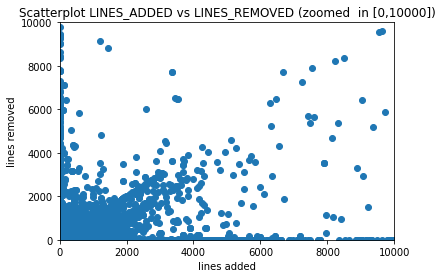

In [21]:
plt.scatter(commits['LINES_ADDED'].astype(int), commits['LINES_REMOVED'].astype(int))
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.title('Scatterplot LINES_ADDED vs LINES_REMOVED (zoomed  in [0,10000])')
plt.xlabel('lines added')
plt.ylabel('lines removed');

## Word clouds
Using wordclouds to check if there exists a noticeable difference of word distributions between issues of different duration

### Summaries

In [22]:
text_data = jira[["SUMMARY", "RESOLUTION_DATE", "CREATION_DATE"]].copy()
text_data = text_data[text_data['RESOLUTION_DATE'] != ""].copy()
text_data['dur'] = jira["RESOLUTION_DATE"].apply(parse_date) - jira["CREATION_DATE"].apply(parse_date)
text_data['dur'] = [d.days for d in text_data['dur']]
perc25 = np.percentile(list(text_data['dur']), 25)
perc75 = np.percentile(list(text_data['dur']), 75)
txt1 = " ".join(list(text_data[text_data['dur'] >= perc75].copy()['SUMMARY']))
txt2 = " ".join(list(text_data[text_data['dur'] <= perc25].copy()['SUMMARY']))

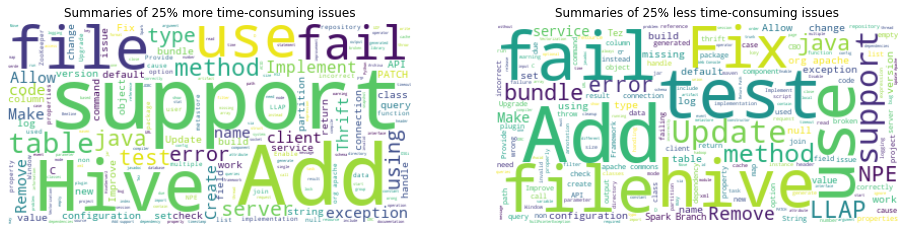

In [23]:
plt.subplot(121)
wc1 = wc.WordCloud(background_color="White").generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title("Summaries of 25% more time-consuming issues")

plt.subplot(122)
wc1 = wc.WordCloud(background_color="White").generate(txt2)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title("Summaries of 25% less time-consuming issues")

plt.gcf().set_size_inches(16, 4)

### Descriptions

In [27]:
text_data = jira[["DESCRIPTION", "RESOLUTION_DATE", "CREATION_DATE"]].copy()
text_data = text_data[text_data['RESOLUTION_DATE'] != ""].copy()
text_data['dur'] = jira["RESOLUTION_DATE"].apply(parse_date) - jira["CREATION_DATE"].apply(parse_date)
text_data['dur'] = [d.days for d in text_data['dur']]
perc25 = np.percentile(list(text_data['dur']), 25)
perc75 = np.percentile(list(text_data['dur']), 75)
txt1 = " ".join(list(text_data[text_data['dur'] >= perc75].copy()['DESCRIPTION']))
txt2 = " ".join(list(text_data[text_data['dur'] <= perc25].copy()['DESCRIPTION']))

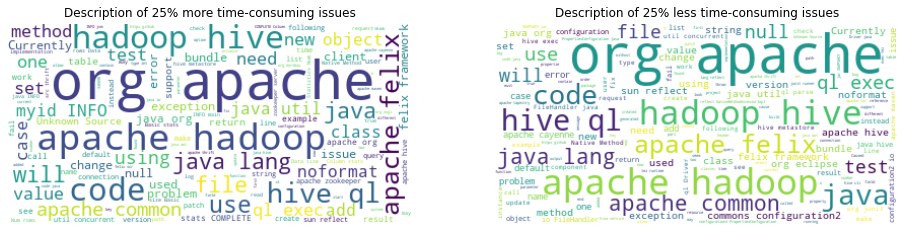

In [28]:
plt.subplot(121)
wc1 = wc.WordCloud(background_color="White").generate(txt1)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title("Description of 25% more time-consuming issues")

plt.subplot(122)
wc1 = wc.WordCloud(background_color="White").generate(txt2)
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.title("Description of 25% less time-consuming issues")

plt.gcf().set_size_inches(16, 4)